## Análise e tratamento dos dados 

In [1]:
import pandas as pd 

college = pd.read_csv('College.csv')

In [2]:
college.shape

(777, 19)

In [3]:
for i in college:
    print(college[i].describe([0.1, 0.9, 0.95]), '\n')

count                   777
unique                  777
top       Alfred University
freq                      1
Name: Unnamed: 0, dtype: object 

count     777
unique      2
top       Yes
freq      565
Name: Private, dtype: object 

count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
10%        457.600000
50%       1558.000000
90%       7675.000000
95%      11066.200000
max      48094.000000
Name: Apps, dtype: float64 

count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
10%        361.600000
50%       1110.000000
90%       4814.200000
95%       6979.200000
max      26330.000000
Name: Accept, dtype: float64 

count     777.000000
mean      779.972973
std       929.176190
min        35.000000
10%       154.000000
50%       434.000000
90%      1903.600000
95%      2757.000000
max      6392.000000
Name: Enroll, dtype: float64 

count    777.000000
mean      27.558559
std       17.640364
min        1.000000
10%       1

In [4]:
college = college[(college['Apps'] < 2200) & (college['Accept'] <  4814 ) & (college['Enroll'] < 1903) & (college['Top10perc'] < 50) & (college['Top25perc'] < 85) \
    & (college['F.Undergrad'] < 10024) & (college['P.Undergrad'] < 2016) & (college['Outstate'] < 16552) & (college['Room.Board'] < 5950) \
     & (college['Books'] < 700) & (college['Personal'] < 2200) & (college['PhD'] < 92) & (college['Terminal'] < 96) \
       & (college['S.F.Ratio'] < 19) & (college['perc.alumni'] < 40) & (college['Expend'] < 14841) & (college['Grad.Rate'] < 89)]

In [5]:
y = college['Private']
college = college.drop(columns=['Unnamed: 0', 'Private'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(college, y, test_size=0.33, random_state=42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
output = kmeans.predict(X_test)

Silhouette

For n_clusters = 2 The average silhouette_score is : 0.183785134582185
For n_clusters = 3 The average silhouette_score is : 0.1662187539106661
For n_clusters = 4 The average silhouette_score is : 0.11194226300154944
For n_clusters = 5 The average silhouette_score is : 0.11732766728030819
For n_clusters = 6 The average silhouette_score is : 0.11652752964342754


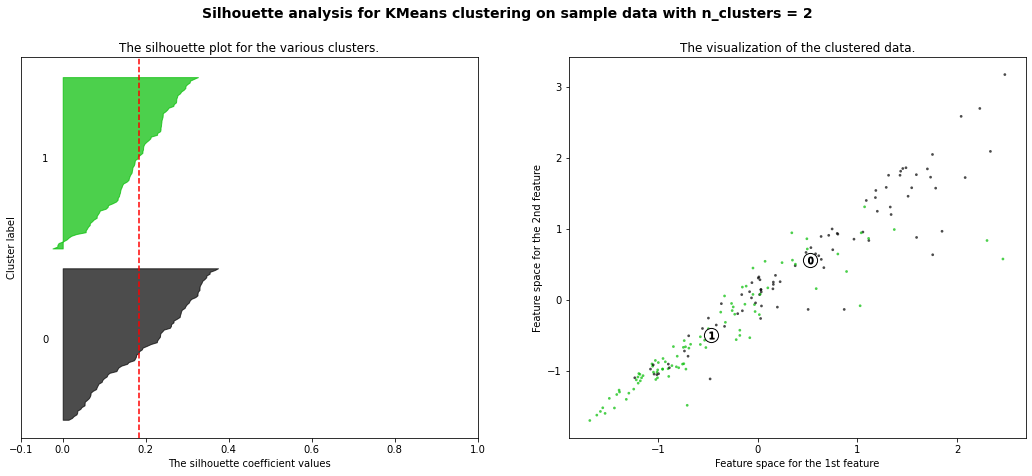

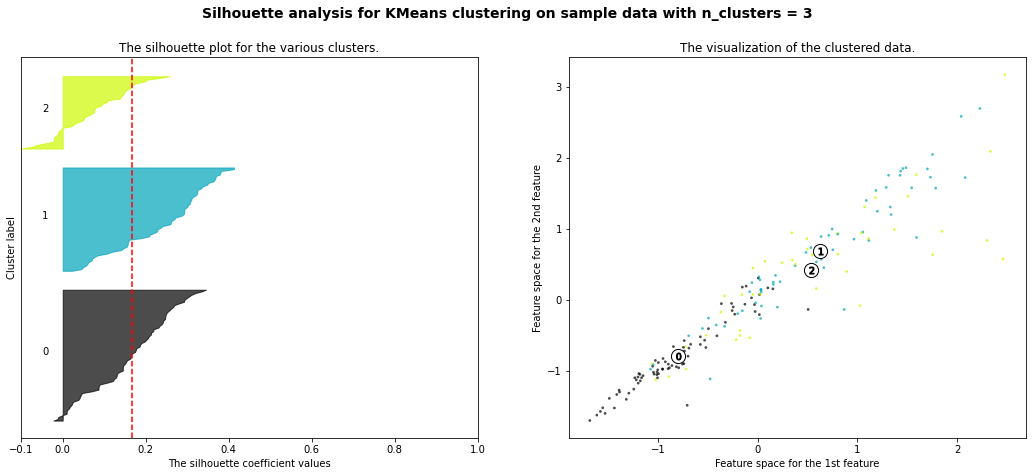

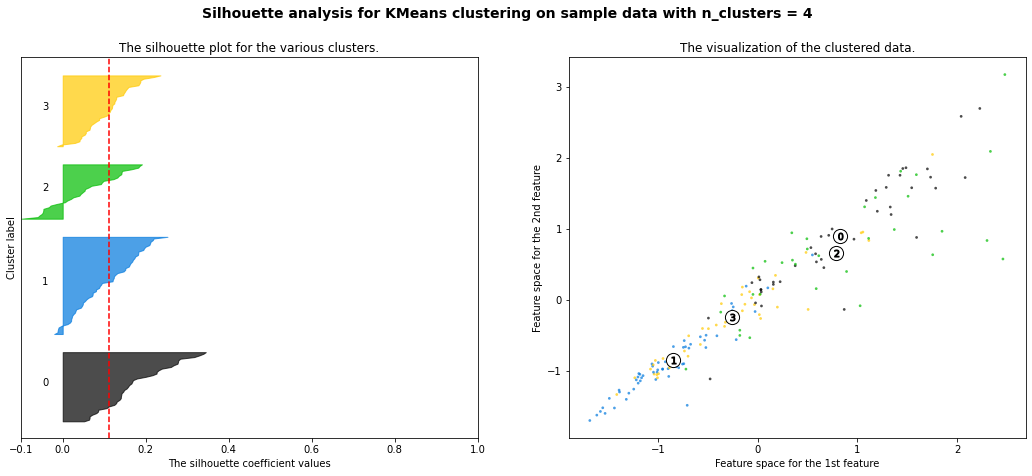

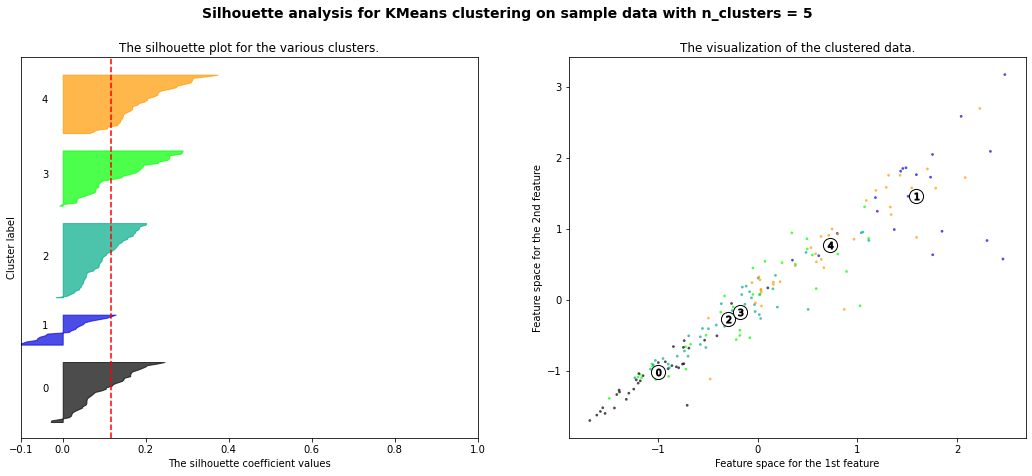

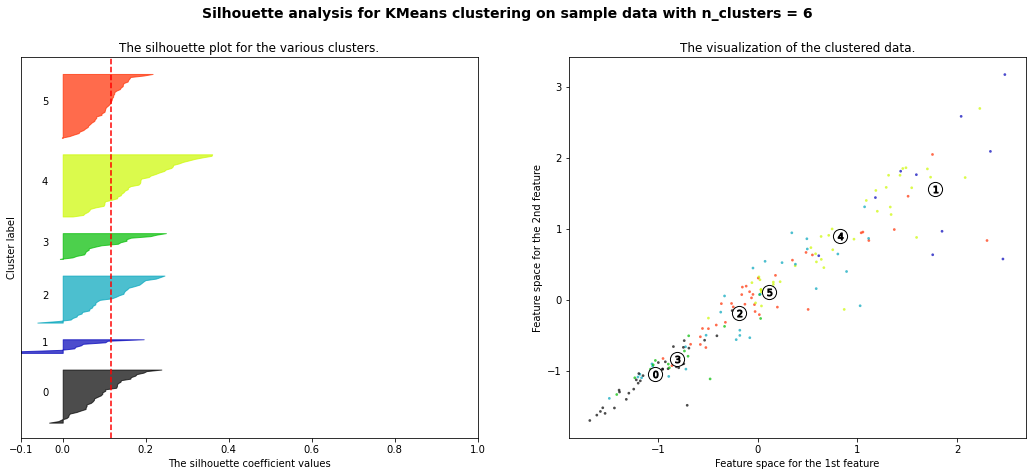

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_train) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train)

    silhouette_avg = silhouette_score(X_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train[:, 0], X_train[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Plot - Elbow

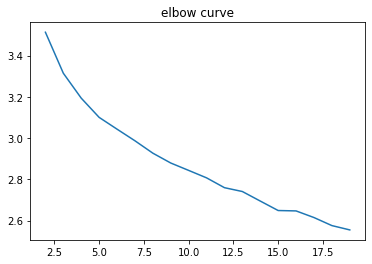

In [13]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


res = list()
n_cluster = range(2,20)
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_train)
    res.append(np.average(np.min(cdist(X_train, kmeans.cluster_centers_, 'euclidean'), axis=1)))

plt.plot(n_cluster, res)
plt.title('elbow curve')
plt.show()


PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2, batch_size=3)
ipca.fit(X_train)

X_train = ipca.transform(X_train) 
X_test = ipca.transform(X_test) 